# Imputing NaNs

### Import packages, import pickle file

In [1]:
import numpy as np
import pandas as pd
from os import path
import pickle

pd.options.display.max_seq_items = 2000

In [2]:
openfile=open( r"C:\Users\Joseph\Documents\Beamly\TakeHomeTask\beamly_case_study2.pickle", "rb")
df=pickle.load(openfile)
openfile.close()

#### Make the usual checks to the dataframe: shape, columns, header

In [3]:
df.shape

(27091, 13)

In [4]:
df.columns

Index(['date', 'avg_hour', 'min_hour', 'max_hour', 'device_name',
       'productBand', 'avg_price', 'total_products', 'num_orders', 'city',
       'region', 'County', 'Country'],
      dtype='object')

In [5]:
df.head(20)

,date,avg_hour,min_hour,max_hour,device_name,productBand,avg_price,total_products,num_orders,city,region,County,Country
1,2018-07-12,20.0,20,20,Mobile,between20and30,29.950,1.0,1,Redbourn,Hertfordshire,Hertfordshire,England
2,2018-08-05,22.0,22,22,Desktop and Laptop,between20and30,27.950,1.0,1,Bearsden,East Dunbartonshire,NaN,NaN
3,2018-07-13,14.0,14,14,Mobile,between20and30,27.950,1.0,1,Bearsden,East Dunbartonshire,NaN,NaN
5,2018-08-10,19.0,19,19,Tablet,lessThan10,9.950,1.0,1,Bearsden,East Dunbartonshire,NaN,NaN
6,2018-07-12,17.0,17,17,Desktop and Laptop,between20and30,29.950,1.0,1,Greenwich,Greenwich,NaN,NaN
7,2018-07-09,16.0,16,16,Mobile,between20and30,29.950,1.0,1,Greenwich,Greenwich,NaN,NaN
8,2018-07-05,11.0,11,11,Desktop and Laptop,lessThan10,8.990,1.0,1,Greenwich,Greenwich,NaN,NaN
10,2018-08-07,18.0,18,18,Desktop and Laptop,lessThan10,1.990,4.0,1,Greenwich,Greenwich,NaN,NaN
11,2018-08-11,12.0,12,12,Desktop and Laptop,between10and20,19.950,1.0,1,Greenwich,Greenwich,NaN,NaN
12,2018-07-17,12.5,11,14,Tablet,between20and30,26.225,2.0,2,Greenwich,Greenwich,NaN,NaN


#### Note on Nans

Nans exist in the following columns and need to be imputed: avg_price, total_products, County, Country


 Start with something 'easy' or not too important. Want to think about how could impute Country/County, so look to see if city or region can help.

### Impute Country/County

First I want to look at what different countries and counties there are. Originally I was wondering if I could cross-correlate them, and use county to fill in country and vice-versa.

In [6]:
df.groupby(['Country'])['County'].unique().to_dict()

{'England': array(['Hertfordshire', 'Suffolk', 'Worcestershire', 'West Sussex',
        'Lincolnshire', 'Essex', 'North Yorkshire', 'Cornwall', 'Devon',
        'Norfolk', 'Hampshire', 'Buckinghamshire', 'Nottinghamshire',
        'East Sussex', 'Kent', 'Lancashire', 'Staffordshire', 'Bristol',
        'Surrey', 'Cumbria', 'Northumberland', 'Derbyshire',
        'Northamptonshire', 'Gloucestershire', 'Cambridgeshire',
        'Oxfordshire', 'Warwickshire', 'Somerset', 'Wiltshire', 'Dorset',
        'Shropshire', 'Bedfordshire', 'Leicestershire', 'Herefordshire',
        'Rutland'], dtype=object),
 'Scotland': array(['Falkirk', 'East Lothian', 'Fife', 'Clackmannanshire', 'Moray',
        'West Lothian', 'Scottish Borders', 'Aberdeenshire', 'Angus'],
       dtype=object),
 'Wales': array(['Pembrokeshire', 'Conwy', 'Monmouthshire', 'Carmarthenshire',
        'Gwynedd', 'Denbighshire', 'Ceredigion', 'Wrexham', 'Flintshire',
        'Powys'], dtype=object)}

In [7]:
country_city_dict=df.groupby(['Country'])['city'].unique().to_dict()
for i in country_city_dict['England']:
    if i=='Greenwich':
        print(i)

Was thinking of using the city and region to impute a county and country, but looks like that won't work as the country and county are missing together. 

I think the easiest thing to do now would be to replace the missing fields with missing_country and missing_county. Especially as it is not relevant to the problem, which is just to forecast sales, with no specific to country or county.

#### Imputing county/country
use "pd.notnull(x)==True else 'missing_country'" to reassign the value of the country or county to missing_X if there is currently no value.

In [10]:
df_e=df

In [11]:
df_e['Country']=df['Country'].apply(lambda x: x if pd.notnull(x)==True else 'missing_country')

In [12]:
df_e['County']=df['County'].apply(lambda x: x if pd.notnull(x)==True else 'missing_county')

In [13]:
df_e.head()

,date,avg_hour,min_hour,max_hour,device_name,productBand,avg_price,total_products,num_orders,city,region,County,Country
1,2018-07-12,20.0,20,20,Mobile,between20and30,29.950,1.0,1,Redbourn,Hertfordshire,Hertfordshire,England
2,2018-08-05,22.0,22,22,Desktop and Laptop,between20and30,27.950,1.0,1,Bearsden,East Dunbartonshire,missing_county,missing_country
3,2018-07-13,14.0,14,14,Mobile,between20and30,27.950,1.0,1,Bearsden,East Dunbartonshire,missing_county,missing_country
5,2018-08-10,19.0,19,19,Tablet,lessThan10,9.950,1.0,1,Bearsden,East Dunbartonshire,missing_county,missing_country
6,2018-07-12,17.0,17,17,Desktop and Laptop,between20and30,29.950,1.0,1,Greenwich,Greenwich,missing_county,missing_country
7,2018-07-09,16.0,16,16,Mobile,between20and30,29.950,1.0,1,Greenwich,Greenwich,missing_county,missing_country
8,2018-07-05,11.0,11,11,Desktop and Laptop,lessThan10,8.990,1.0,1,Greenwich,Greenwich,missing_county,missing_country
10,2018-08-07,18.0,18,18,Desktop and Laptop,lessThan10,1.990,4.0,1,Greenwich,Greenwich,missing_county,missing_country
11,2018-08-11,12.0,12,12,Desktop and Laptop,between10and20,19.950,1.0,1,Greenwich,Greenwich,missing_county,missing_country
12,2018-07-17,12.5,11,14,Tablet,between20and30,26.225,2.0,2,Greenwich,Greenwich,missing_county,missing_country


So nans are now imputed for the two easy ones, now need to do the harder ones. avg_price and total_products and band. Should probably do total products first, becuase that looks a litle easier. First will check if there are any nans at the same time.

### Imputing for avg_price and total_products

Again, the avg_price and total_products seem related, so I was wondering if it was possible to use one to impute the other.

In [14]:
def check_nans_in_two_columns(row):
    if pd.notnull(row['avg_price']) or pd.notnull(row['total_products']):
        
        return 0
    else:
        print(pd.notnull(row['avg_price']),pd.notnull(row['total_products']))
        return 1
sum(df.apply(lambda row:check_nans_in_two_columns(row),axis=1))

False False
False False
False False
False False
False False
False False


6

Only 6 at the same time, I just cut those out. However it seems a shame to loose data and also, looking at the header of the dataframe (above), I've noticed that the order number seems to always be larger than the total products.

Focusing on total products, I think total_products and order num orders are related, where total_products>order_number always. But will check this with the following function and apply.

In [15]:
def check_orderno_totprod_relationship(row):
    """
    checks to see if the total_products is larger than the order_number
    """
    if row['total_products']>=row['num_orders'] or pd.notnull(row['total_products'])==False:
        return 0
    else:
        print(row['total_products'],row['num_orders'])
        return 1
sum(df.apply(lambda row:check_orderno_totprod_relationship(row),axis=1))

0

Ok so I'm right about this relationship, so I will base this imputation on the order number.

find the mean relation between order_number and total products, need dataframe without nans in the total product row.


In [16]:
df_tp_noNaNs = df[np.isfinite(df['total_products'])]

Now find the mean difference

In [17]:
def calc_orderno_totprod_relationship(row):
    return row['total_products']/row['num_orders']
tot_product_imputation=np.mean(df_tp_noNaNs.apply(lambda row:calc_orderno_totprod_relationship(row),axis=1))

Can now impute this value. Note that need to add +0.5 so that when I use int() the value is rounded up and not down.

In [18]:
def impute_tp(row):
    if pd.notnull(row['total_products'])==False:
        return int(row['num_orders']*tot_product_imputation+0.5)#+0.5 is to round up instead of down
    else:
        return row['total_products']
df_e['total_products']=df.apply(lambda row: impute_tp(row),axis=1)
df_e.head()

,date,avg_hour,min_hour,max_hour,device_name,productBand,avg_price,total_products,num_orders,city,region,County,Country
1,2018-07-12,20.0,20,20,Mobile,between20and30,29.950,1.0,1,Redbourn,Hertfordshire,Hertfordshire,England
2,2018-08-05,22.0,22,22,Desktop and Laptop,between20and30,27.950,1.0,1,Bearsden,East Dunbartonshire,missing_county,missing_country
3,2018-07-13,14.0,14,14,Mobile,between20and30,27.950,1.0,1,Bearsden,East Dunbartonshire,missing_county,missing_country
5,2018-08-10,19.0,19,19,Tablet,lessThan10,9.950,1.0,1,Bearsden,East Dunbartonshire,missing_county,missing_country
6,2018-07-12,17.0,17,17,Desktop and Laptop,between20and30,29.950,1.0,1,Greenwich,Greenwich,missing_county,missing_country
7,2018-07-09,16.0,16,16,Mobile,between20and30,29.950,1.0,1,Greenwich,Greenwich,missing_county,missing_country
8,2018-07-05,11.0,11,11,Desktop and Laptop,lessThan10,8.990,1.0,1,Greenwich,Greenwich,missing_county,missing_country
10,2018-08-07,18.0,18,18,Desktop and Laptop,lessThan10,1.990,4.0,1,Greenwich,Greenwich,missing_county,missing_country
11,2018-08-11,12.0,12,12,Desktop and Laptop,between10and20,19.950,1.0,1,Greenwich,Greenwich,missing_county,missing_country
12,2018-07-17,12.5,11,14,Tablet,between20and30,26.225,2.0,2,Greenwich,Greenwich,missing_county,missing_country


The new dataframe looks good, check the histogram as well.

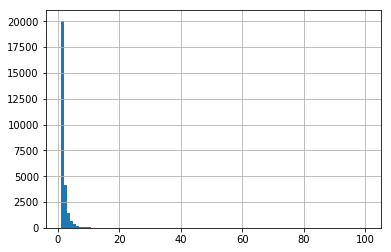

In [23]:
df_e['total_products'].hist(bins=100)

looks good to me, now for the harder bit, imputing the data for avg_price. 

### Imputing avg_price
Look at the NaN data for avg_price a bit first. I am wondering if there is a clever solution, but I may have to impute the mean avg_price. Make two new dataframes for this check.

In [24]:
df_ap_NaNs=df[np.isfinite(df['avg_price'])==False]

In [31]:
df_ap_noNaNs=df[np.isfinite(df['avg_price'])]

How many NaNs are there, instead of avg_price, on each day.

In [30]:
df_ap_NaNs.sort_values(['date']).groupby(['date']).count()

,avg_hour,min_hour,max_hour,device_name,productBand,avg_price,total_products,num_orders,city,region,County,Country
date,,,,,,,,,,,,
2018-07-01,41,41,41,41,41,0,41,41,41,41,41,41
2018-07-02,55,55,55,55,55,0,55,55,55,55,55,55
2018-07-03,51,51,51,51,51,0,51,51,51,51,51,51
2018-07-04,47,47,47,47,47,0,47,47,47,47,47,47
2018-07-05,49,49,49,49,49,0,49,49,49,49,49,49
2018-07-06,45,45,45,45,45,0,45,45,45,45,45,45
2018-07-07,18,18,18,18,18,0,18,18,18,18,18,18
2018-07-08,20,20,20,20,20,0,20,20,20,20,20,20
2018-07-09,35,35,35,35,35,0,35,35,35,35,35,35


The NaNs are evenly spread over the time period, except the end two weeks, but this is obviously not including mobile data. It's tempting to just drop these rows, but considering we are trying to forcast number of sales and not amount of sales, it shouldn't affect the results to impute something such as the mean. However if we wanted to forecast turnover then we shold really drop these rows.

Impute the mean avg_price for the missing values.

In [34]:
def impute_ap(row):
    if pd.notnull(row['avg_price'])==False:
        return df_ap_noNaNs['avg_price'].mean()
    else:
        return row['avg_price']
df_e['avg_price']=df.apply(lambda row: impute_ap(row),axis=1)
df_e.head()



,date,avg_hour,min_hour,max_hour,device_name,productBand,avg_price,total_products,num_orders,city,region,County,Country
1,2018-07-12,20.0,20,20,Mobile,between20and30,29.950000,1.0,1,Redbourn,Hertfordshire,Hertfordshire,England
2,2018-08-05,22.0,22,22,Desktop and Laptop,between20and30,27.950000,1.0,1,Bearsden,East Dunbartonshire,missing_county,missing_country
3,2018-07-13,14.0,14,14,Mobile,between20and30,27.950000,1.0,1,Bearsden,East Dunbartonshire,missing_county,missing_country
5,2018-08-10,19.0,19,19,Tablet,lessThan10,9.950000,1.0,1,Bearsden,East Dunbartonshire,missing_county,missing_country
6,2018-07-12,17.0,17,17,Desktop and Laptop,between20and30,29.950000,1.0,1,Greenwich,Greenwich,missing_county,missing_country
7,2018-07-09,16.0,16,16,Mobile,between20and30,29.950000,1.0,1,Greenwich,Greenwich,missing_county,missing_country
8,2018-07-05,11.0,11,11,Desktop and Laptop,lessThan10,8.990000,1.0,1,Greenwich,Greenwich,missing_county,missing_country
10,2018-08-07,18.0,18,18,Desktop and Laptop,lessThan10,1.990000,4.0,1,Greenwich,Greenwich,missing_county,missing_country
11,2018-08-11,12.0,12,12,Desktop and Laptop,between10and20,19.950000,1.0,1,Greenwich,Greenwich,missing_county,missing_country
12,2018-07-17,12.5,11,14,Tablet,between20and30,26.225000,2.0,2,Greenwich,Greenwich,missing_county,missing_country


### Check Imputation has worked

In [35]:
df_e.isnull().any()

date              False
avg_hour          False
min_hour          False
max_hour          False
device_name       False
productBand       False
avg_price         False
total_products    False
num_orders        False
city              False
region            False
County            False
Country           False
dtype: bool

Yay, no more NaNs in any columns.

#### Save file as pickle

In [36]:
filehandler = open(r"C:\Users\Joseph\Documents\Beamly\TakeHomeTask\beamly_case_study_noNaNs.pickle","wb")
pickle.dump(df_e,filehandler)
filehandler.close()